In [52]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score

In [4]:
# Step 1: Create sample data
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)
y = np.array([2, 7, 15, 28, 46, 68, 95, 127, 164, 206])

In [6]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [8]:
y

array([  2,   7,  15,  28,  46,  68,  95, 127, 164, 206])

In [11]:
linear_model = LinearRegression()
linear_model.fit(X,y)
y_linear = linear_model.predict(X)

In [13]:
y_linear

array([-25.6       ,  -3.06666667,  19.46666667,  42.        ,
        64.53333333,  87.06666667, 109.6       , 132.13333333,
       154.66666667, 177.2       ])

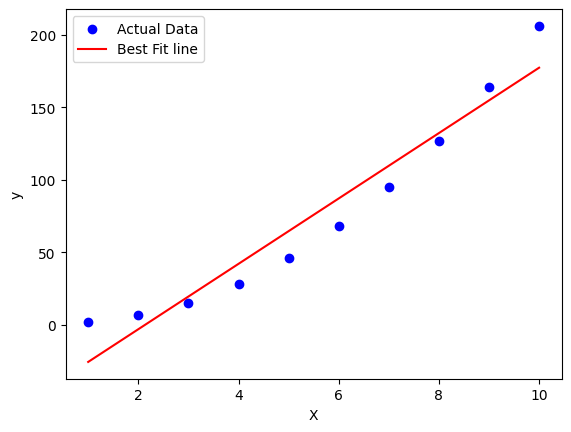

In [15]:
plt.scatter(X, y, color = 'blue', label = 'Actual Data')
plt.plot(X, y_linear, color = 'red', label = 'Best Fit line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [17]:
poly = PolynomialFeatures(degree = 2)

In [19]:
X_poly = poly.fit_transform(X)

In [21]:
X_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [23]:
poly_model = LinearRegression()
poly_model.fit(X_poly,y)
y_poly = poly_model.predict(X_poly)

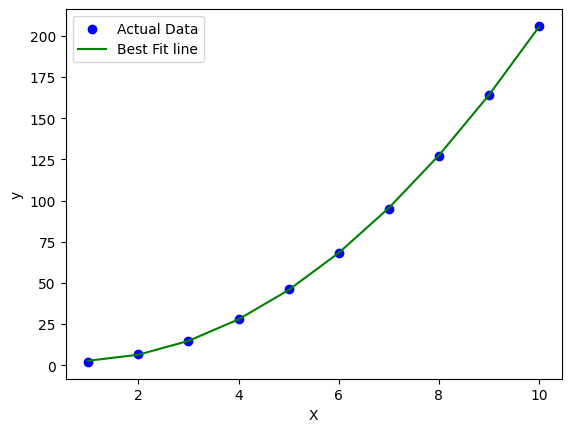

In [25]:
plt.scatter(X, y, color = 'blue', label = 'Actual Data')
plt.plot(X, y_poly, color = 'green', label = 'Best Fit line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

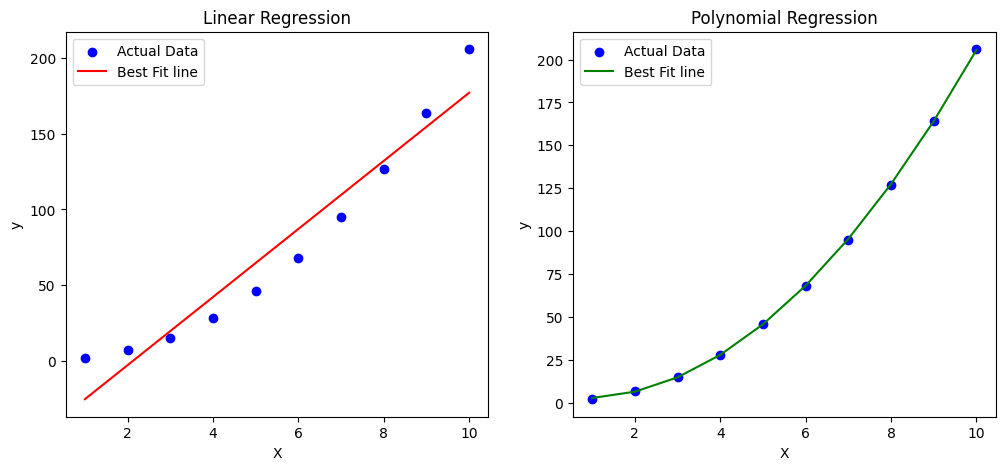

In [27]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
plt.scatter(X, y, color = 'blue', label = 'Actual Data')
plt.plot(X, y_linear, color = 'red', label = 'Best Fit line')
plt.title('Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

plt.subplot(1,2,2)
plt.scatter(X, y, color = 'blue', label = 'Actual Data')
plt.plot(X, y_poly, color = 'green', label = 'Best Fit line')
plt.title('Polynomial Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [29]:
data = pd.read_csv('https://media.githubusercontent.com/media/nursnaaz/DataScienceMasterclass/main/07%20-%20Polynomial%20Regression/data_poly.csv')


In [31]:
data

,x,y
0,0,3
1,1,4
2,2,5
3,3,7
4,4,10
5,5,8
6,6,9
7,7,10
8,8,10
9,9,23


In [33]:
linear_model = LinearRegression()
linear_model.fit(data[['x']],data['y'])
y_linear = linear_model.predict(data[['x']])

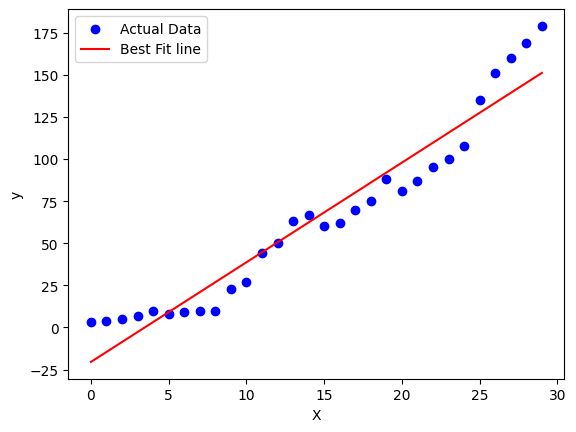

In [35]:
plt.scatter(data['x'], data['y'], color = 'blue', label = 'Actual Data')
plt.plot(data['x'], y_linear, color = 'red', label = 'Best Fit line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [55]:
r2_score(data['y'], y_linear)

0.9316557748545744

In [38]:
poly_2 = PolynomialFeatures(degree = 2)
poly_3 = PolynomialFeatures(degree = 3)
poly_4 = PolynomialFeatures(degree = 4)
poly_5 = PolynomialFeatures(degree = 5)
poly_10 = PolynomialFeatures(degree = 15)

In [40]:
X_poly_2 = poly_2.fit_transform(data[['x']])
X_poly_3 = poly_3.fit_transform(data[['x']])
X_poly_4 = poly_4.fit_transform(data[['x']])
X_poly_5 = poly_5.fit_transform(data[['x']])
X_poly_10 = poly_10.fit_transform(data[['x']])

In [42]:
poly_model_2 = LinearRegression()
poly_model_3 = LinearRegression()
poly_model_4 = LinearRegression()
poly_model_5 = LinearRegression()
poly_model_10 = LinearRegression()


In [44]:
poly_model_2.fit(X_poly_2,data['y'])
poly_model_3.fit(X_poly_3,data['y'])
poly_model_4.fit(X_poly_4,data['y'])
poly_model_5.fit(X_poly_5,data['y'])
poly_model_10.fit(X_poly_10,data['y'])


LinearRegression()

In [47]:
data_pred_poly_2 = poly_model_2.predict(X_poly_2)
data_pred_poly_3 = poly_model_3.predict(X_poly_3)
data_pred_poly_4 = poly_model_4.predict(X_poly_4)
data_pred_poly_5 = poly_model_5.predict(X_poly_5)
data_pred_poly_10 = poly_model_10.predict(X_poly_10)

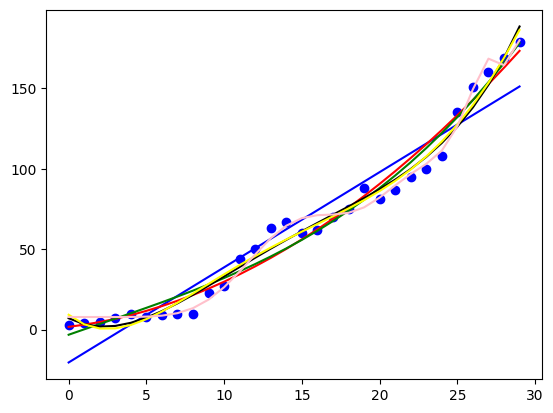

In [54]:
plt.scatter(data['x'], data['y'], color = 'blue', label = 'Actual Data')
plt.plot(data['x'], y_linear, color = 'blue', label = 'Best Fit line')
plt.plot(data['x'], data_pred_poly_2, color = 'red', label = 'Degree 2')
plt.plot(data['x'], data_pred_poly_3, color = 'green', label = 'Degree 3')
plt.plot(data['x'], data_pred_poly_4, color = 'black', label = 'Degree 4')
plt.plot(data['x'], data_pred_poly_5, color = 'yellow', label = 'Degree 5')
plt.plot(data['x'], data_pred_poly_10, color = 'pink', label = 'Degree 10')
plt.show()

In [56]:
print("R2 Score Linear Regression: ", r2_score(data['y'], y_linear))
print("R2 Score Polynomial Regression Degree 2: ",r2_score(data['y'], data_pred_poly_2))
print("R2 Score Polynomial Regression Degree 3: ",r2_score(data['y'], data_pred_poly_3))
print("R2 Score Polynomial Regression Degree 4: ",r2_score(data['y'], data_pred_poly_4))
print("R2 Score Polynomial Regression Degree 5: ",r2_score(data['y'], data_pred_poly_5))
print("R2 Score Polynomial Regression Degree 15: ",r2_score(data['y'], data_pred_poly_10))

R2 Score Linear Regression:  0.9316557748545744
R2 Score Polynomial Regression Degree 2:  0.9742355121173141
R2 Score Polynomial Regression Degree 3:  0.9760588291456355
R2 Score Polynomial Regression Degree 4:  0.9841567128747181
R2 Score Polynomial Regression Degree 5:  0.9845777073755908
R2 Score Polynomial Regression Degree 15:  0.9914433545637202


In [58]:
train_X, test_X, train_y, test_y = train_test_split(data[['x']], data['y'], test_size = 0.45, random_state = 30)

In [60]:
train_X.shape, test_X.shape, train_y.shape, test_y.shape

((16, 1), (14, 1), (16,), (14,))

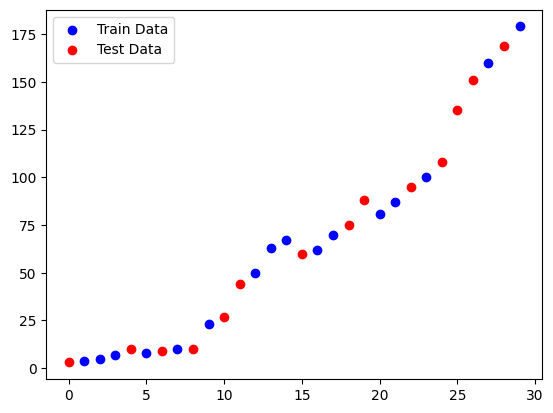

In [62]:
plt.scatter(train_X, train_y, color = 'blue', label = 'Train Data')
plt.scatter(test_X, test_y, color = 'red', label = 'Test Data')
plt.legend()
plt.show()

In [64]:
train_r2 = []
test_r2 = []
for i in range(1,15):
    poly = PolynomialFeatures(degree = i)
    train_X_poly = poly.fit_transform(train_X)
    test_X_poly = poly.transform(test_X)
    poly_model = LinearRegression()
    poly_model.fit(train_X_poly,train_y)
    train_y_poly = poly_model.predict(train_X_poly)
    test_y_poly = poly_model.predict(test_X_poly)
    train_r2.append(r2_score(train_y, train_y_poly))
    test_r2.append(r2_score(test_y, test_y_poly))
    print("Train : ","Degree: ", i, "R2 Score: ", r2_score(train_y, train_y_poly))
    print("Test : ","Degree: ", i, "R2 Score: ", r2_score(test_y, test_y_poly))

Train :  Degree:  1 R2 Score:  0.9260177606864696
Test :  Degree:  1 R2 Score:  0.9359027682294706
Train :  Degree:  2 R2 Score:  0.9685226622126862
Test :  Degree:  2 R2 Score:  0.9790146010565959
Train :  Degree:  3 R2 Score:  0.9739101985255328
Test :  Degree:  3 R2 Score:  0.9739350797206247
Train :  Degree:  4 R2 Score:  0.9860452419122449
Test :  Degree:  4 R2 Score:  0.9748564119349126
Train :  Degree:  5 R2 Score:  0.9887115990241098
Test :  Degree:  5 R2 Score:  0.968451747077857
Train :  Degree:  6 R2 Score:  0.9962320601422843
Test :  Degree:  6 R2 Score:  0.9869804404472325
Train :  Degree:  7 R2 Score:  0.9966576374092464
Test :  Degree:  7 R2 Score:  0.9811503104309612
Train :  Degree:  8 R2 Score:  0.9967050105753041
Test :  Degree:  8 R2 Score:  0.9844574014343502
Train :  Degree:  9 R2 Score:  0.9985427097585423
Test :  Degree:  9 R2 Score:  0.9548443146602873
Train :  Degree:  10 R2 Score:  0.9987112536727284
Test :  Degree:  10 R2 Score:  0.9636221577749022
Train :  

In [66]:
train_r2

[0.9260177606864696,
 0.9685226622126862,
 0.9739101985255328,
 0.9860452419122449,
 0.9887115990241098,
 0.9962320601422843,
 0.9966576374092464,
 0.9967050105753041,
 0.9985427097585423,
 0.9987112536727284,
 0.9986240665315284,
 0.9984220130752658,
 0.9983698666581534,
 0.9986087071117874]

/tmp/ipython-input-4124035220.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


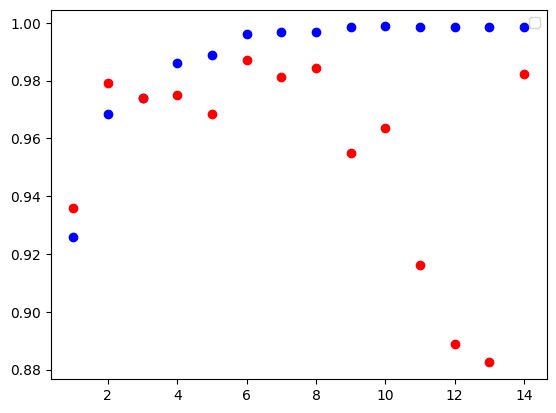

In [68]:
plt.scatter(x = range(1,15),y = train_r2, color = 'blue')
plt.scatter(x = range(1,15),y = test_r2, color = 'red')
plt.legend()
plt.show()

In [70]:
train_y_poly

array([  5.48698093,  66.76711606,  10.71428586,  23.49968081,
         5.51030973,  64.81087554,  67.25043349,  87.4161357 ,
         5.48826442,  99.90643312,  52.87681466,  80.74505834,
       160.0047366 ,  60.32166495, 178.99931846,   6.20189128])

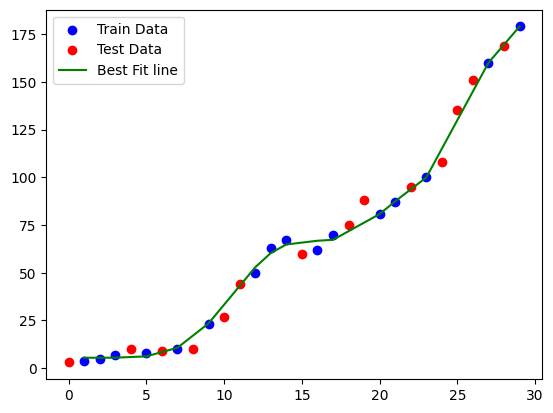

In [72]:
import pandas as pd

plt.scatter(train_X, train_y, color = 'blue', label = 'Train Data')
plt.scatter(test_X, test_y, color = 'red', label = 'Test Data')

# Create a DataFrame to sort train_X and train_y_poly together
plot_data = pd.DataFrame({'x': train_X['x'].values.flatten(), 'y_poly': train_y_poly})
plot_data_sorted = plot_data.sort_values(by='x')

plt.plot(plot_data_sorted['x'], plot_data_sorted['y_poly'], color = 'green', label = 'Best Fit line')
plt.legend()
plt.show()

In [74]:
#When the train data point is changed the polynomial line is also changed
#When the degree of polynomial is increasing the complexity of model increases and it will try to
#predict the train result more accurate but miserably fail during test

Regularization